# Introduction to Machine Learning - Final Project - Group 7

Almog Asraf - 313200511

Daniel Pidtylok - 322558867

Nir Levanon - 313160715

## Imports

In [3092]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import sklearn
import statistics
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import roc_curve, auc, plot_roc_curve, confusion_matrix, plot_confusion_matrix,classification_report

## Part A - Exploration

In [3093]:
data = pd.read_csv("train.csv")

# X - all the data (the feature columns) , y - the label column - 0 or 1
X, y = data.iloc[:,:-1], data.iloc[:,-1]
train = X.drop('id',axis=1)
train.head()

,closeness_to_holiday,B,Month,product_page_duration,BounceRates,info_page_duration,total_duration,device,num_of_admin_pages,num_of_product_pages,...,ExitRates,num_of_info_pages,D,user_type,Region,admin_page_duration,PageValues,A,Weekend,internet_browser
0,0.0,84.958154,Feb,0.0 minutes,0.20,0.0 minutes,NaN,1.0,0.0,1.0,...,0.20,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_1,0.0,safari_13
1,0.0,102.100162,Feb,64.0 minutes,0.00,0.0 minutes,NaN,2.0,0.0,2.0,...,0.10,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_2,0.0,chrome_89
2,0.0,100.991064,Feb,0.0 minutes,0.20,0.0 minutes,NaN,4.0,0.0,1.0,...,0.20,0.0,NaN,Returning_Visitor,9.0,0.0,0.0,c_3,0.0,safari_15
3,0.0,120.605525,Feb,2.666666667 minutes,0.05,0.0 minutes,NaN,3.0,0.0,2.0,...,0.14,0.0,NaN,Returning_Visitor,2.0,0.0,0.0,c_4,0.0,chrome_89
4,0.0,87.423708,Feb,627.5 minutes,0.02,0.0 minutes,NaN,3.0,NaN,10.0,...,0.05,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_4,1.0,browser_3_v9


In [3094]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   closeness_to_holiday   9834 non-null   float64
 1   B                      10456 non-null  float64
 2   Month                  10458 non-null  object 
 3   product_page_duration  9872 non-null   object 
 4   BounceRates            10465 non-null  float64
 5   info_page_duration     10139 non-null  object 
 6   total_duration         5721 non-null   float64
 7   device                 10094 non-null  float64
 8   num_of_admin_pages     10031 non-null  float64
 9   num_of_product_pages   9962 non-null   float64
 10  C                      10461 non-null  object 
 11  ExitRates              10452 non-null  float64
 12  num_of_info_pages      9821 non-null   float64
 13  D                      109 non-null    float64
 14  user_type              10455 non-null  object 
 15  Re

In [3095]:
train.shape

(10479, 21)

In [3096]:
#train.isnull().sum()

In [3097]:
#train.nunique()

In [3098]:
#train.describe()

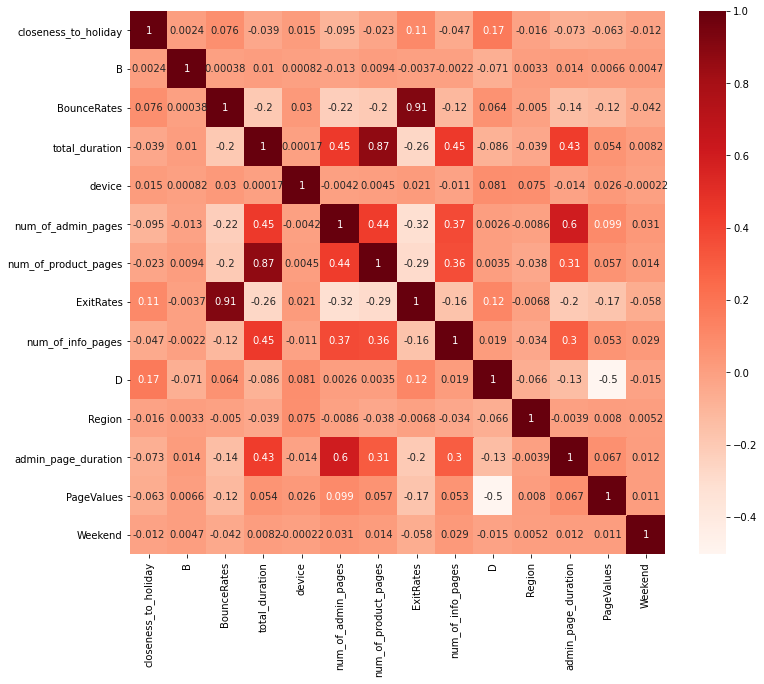

In [3099]:
plt.figure(figsize=(12,10))
train_cor = train.corr()
sns.heatmap(train_cor,
            annot=True,
            cmap=plt.cm.Reds,
            xticklabels=train_cor.columns,
            yticklabels=train_cor.columns)
plt.show()

In [3100]:
#Plotting Functions

# Bar Plot
def bar_plot(x, kind, color, data, height, aspect, x_lab, y_lab, title,name=''):
    sns.catplot(x=x, kind=kind, color=color, data=data, height=height, aspect=aspect);
    plt.ylabel(y_lab)
    plt.xlabel(x_lab)
    plt.title(title)
    # plt.savefig(f'plots/{name}.png',bbox_inches='tight')
    return plt

def categorical_distribution(df, col):
    plt.figure(figsize=(6,5))
    df[col].value_counts().head(15).plot.barh()
    return plt.show

def continuous_distribution(df, col):
    plt.figure(figsize=(6,5))
    df[col].hist()
    return plt.show
  
# Distributions Charts:
def distributions(df, col):
    sns.kdeplot(df[col], shade=True, color = 'darkturquoise');
    plt.title('KDE plot for column %s'%str(col))
    return plt

# Pie Plot
def pie_plot(size, lables, explode, colors, autopct, pctdistance, shadow, center, title, i, figsize):
    plt.figure(figsize=figsize)
    plt.pie(size, labels=lables, explode=explode, colors=colors, autopct=autopct, pctdistance=pctdistance, 
                   shadow=shadow, center=center)
    plt.title(title + ' ' + i)
    return plt

# Corellation Chart:
def corr_chart(df, graph = True):
    corr = df.corr()
    if graph:
        plt.matshow(corr)
        plt.show()
    return corr

# Corellation heatmap chart:
def corr_heat_chart(df, graph = True):
    sns.heatmap(df.corr(),
                xticklabels=df.corr().columns,
                yticklabels=df.corr().columns)
    return plt

#Box plot chart
def boxplot(df,name='box plot'):
    print('Box plot of all features:')
    df.plot.box(figsize=(18,10),patch_artist=True)
    # plt.savefig(f'plots/{name}.png',bbox_inches='tight')
    plt.show()

#Box plot chart
def boxplot_col(df, col_box):
    plt.figure(figsize=(6,5))
    df.boxplot(column=col_box)
    #plt.plot([1], [0], label=df.describe()[col_box]) 
    #plt.legend() 
    return plt.show()

# Scatter
def Scatter (df, col1, col2):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.scatter(df[col1], df[col2])
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    return plt.show()

def groupby_categorical (df, col):
    return df.groupby(col).size()


def continuous_results_by_column (df, col):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    newdf = df.select_dtypes(include=numerics)
    zero_df = newdf[newdf['purchase']==0]
    one_df = newdf[newdf['purchase']==1]
    num_of_bins = 100
    plt.figure()
    fig, ax = plt.subplots()
    ax.hist(zero_df[col], bins=num_of_bins, color='red')
    ax.hist(one_df[col], bins=num_of_bins, color='blue')
    ax.set_title(f'column is {col}')
    plt.plot([0, 1], [0, 1], color='red', linestyle='-', label='Number 0: %d Observations' % zero_df[col].count())
    plt.plot([0, 1], [0, 1], color='blue', linestyle='-', label='Number 1: %d Observations' % one_df[col].count())
    plt.legend()
    plt.show()


def categorical_results_by_column (df, col):
    newdf = df.copy()
    zero_df = newdf1[newdf1['purchase']==0]
    one_df = newdf1[newdf1['purchase']==1]
    z = zero_df[col].value_counts().head(15)
    o = one_df[col].value_counts().head(15)
    pd.DataFrame({('Number 0: %d Observations' % zero_df[col].count()) : z,
                    ('Number 1: %d Observations' % one_df[col].count()): o},
                   index=z.index).plot.barh(color={"red","blue"}, stacked=True)
    return plt.show()

def IQR_col (df):
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [3101]:
def for_continuous(a, df, col):
    print ("Percentage of Null cells: ", df[col].isnull().sum(), "/", train.shape[0],
           " --> ", round(float(df[col].isnull().sum()/train.shape[0])*100, 5), "%")
    print ("\r")
    print ("Percentage of nunique cells: ", df[col].nunique(), "/", train.shape[0],
           " --> ", round(float(df[col].nunique()/train.shape[0])*100, 5), "%")
    print ("\r")
    print ("Summary")
    print (df.describe()[col])
    print ("\r")
    print ("Number of outliers by IQR :", IQR_col(df)[col])
    continuous_distribution(df, col)
    boxplot_col(df, col)
    continuous_results_by_column (a, col)
    cor = df.corr()
    cor_relevant = cor[((cor[col] > 0.8)  & (cor[col] < 1)) | (cor[col] < -0.8)]
    col2 = cor_relevant.index.tolist()
    if len(col2) > 0:
        Scatter(train, col, col2[0])
    

def for_categorical(a, df, col):
    print ("Percentage of Null cells: ", df[col].isnull().sum(), "/", train.shape[0],
           " --> ", round(float(df[col].isnull().sum()/train.shape[0])*100, 5), "%")
    print ("\r")
    print ("Percentage of nunique cells: ", df[col].nunique(), "/", train.shape[0],
           " --> ", round(float(df[col].nunique()/train.shape[0])*100, 5), "%")
    print ("\r")
    print ("Number of outliers by IQR :", IQR_col(df)[col])
    categorical_distribution(df, col)
    print ("\r")
    print ("The number of values in each category")
    print (groupby_categorical(df, col))
    categorical_results_by_column(a, col)

####  Exploration on closeness_to_holiday

Percentage of Null cells:  645 / 10479  -->  6.15517 %

Percentage of nunique cells:  6 / 10479  -->  0.05726 %

Summary
count    9834.000000
mean        0.061826
std         0.199605
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: closeness_to_holiday, dtype: float64

Number of outliers by IQR : 1007


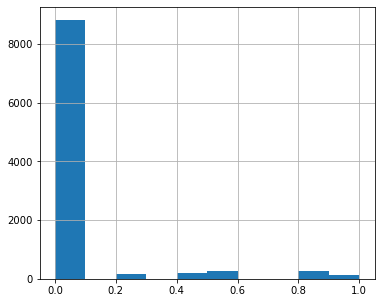

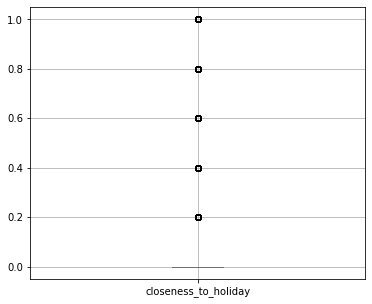

C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

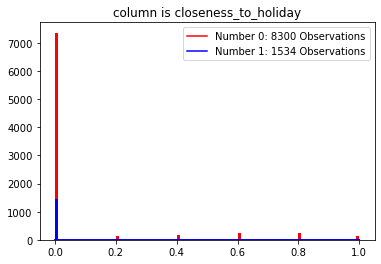

In [3102]:
for_continuous (data, train, "closeness_to_holiday")

####  Exploration on B

Percentage of Null cells:  23 / 10479  -->  0.21949 %

Percentage of nunique cells:  10456 / 10479  -->  99.78051 %

Summary
count    10456.000000
mean       100.059573
std          9.952417
min         65.475267
25%         93.304430
50%        100.025877
75%        106.954284
max        134.272999
Name: B, dtype: float64

Number of outliers by IQR : 62


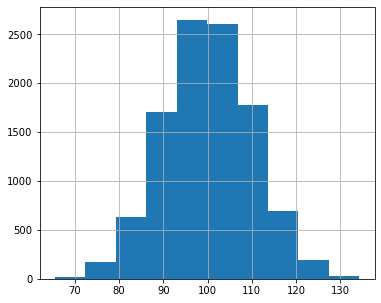

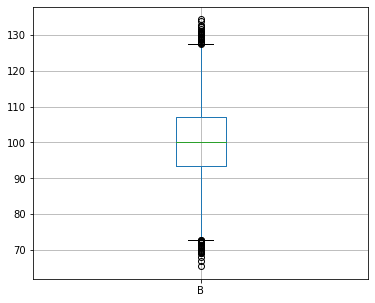

C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

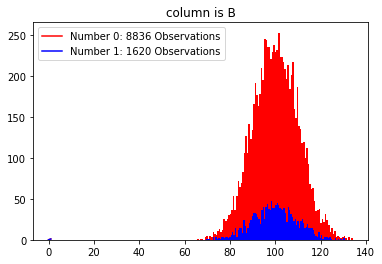

In [3103]:
for_continuous (data, train, "B")

####  Exploration on BounceRates

Percentage of Null cells:  14 / 10479  -->  0.1336 %

Percentage of nunique cells:  1661 / 10479  -->  15.85075 %

Summary
count    10465.000000
mean         0.022255
std          0.048664
min          0.000000
25%          0.000000
50%          0.003109
75%          0.016970
max          0.200000
Name: BounceRates, dtype: float64

Number of outliers by IQR : 1305


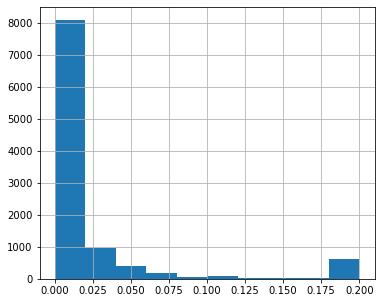

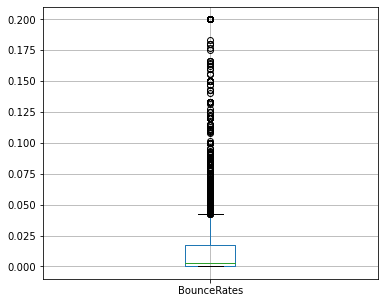

C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

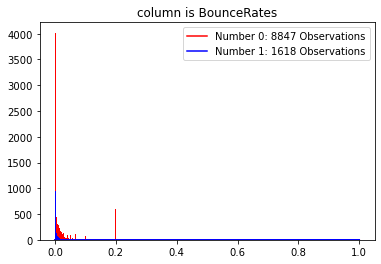

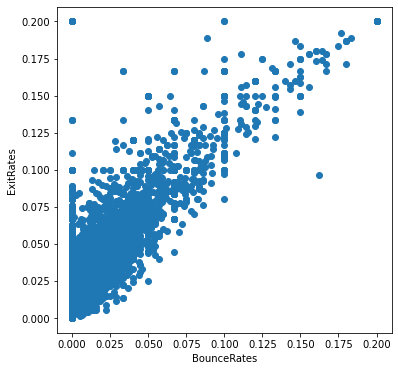

In [3104]:
for_continuous (data, train, "BounceRates")

####  Exploration on total_duration

Percentage of Null cells:  4758 / 10479  -->  45.4051 %

Percentage of nunique cells:  4806 / 10479  -->  45.86315 %

Summary
count     5721.000000
mean      1307.807873
std       1967.444484
min          0.000000
25%        217.000000
50%        682.700000
75%       1626.633333
max      34576.950693
Name: total_duration, dtype: float64

Number of outliers by IQR : 431


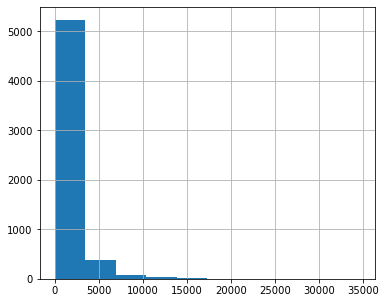

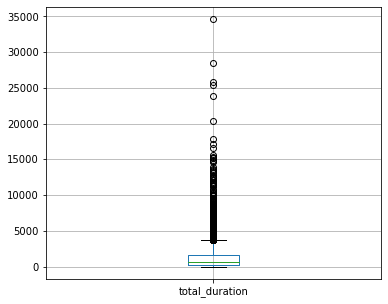

C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

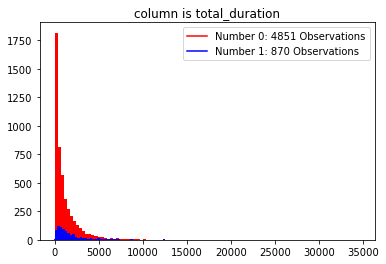

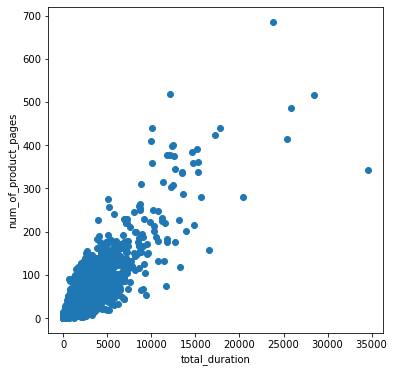

In [3105]:
for_continuous (data, train, "total_duration")

####  Exploration on num_of_admin_pages

Percentage of Null cells:  448 / 10479  -->  4.27522 %

Percentage of nunique cells:  27 / 10479  -->  0.25766 %

Summary
count    10031.000000
mean         2.326986
std          3.336398
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: num_of_admin_pages, dtype: float64

Number of outliers by IQR : 331


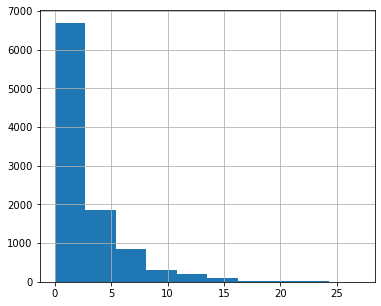

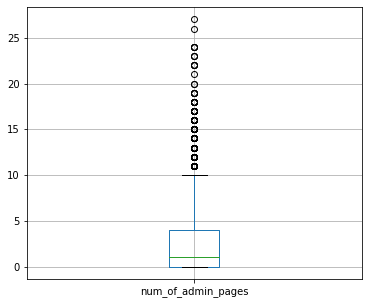

C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

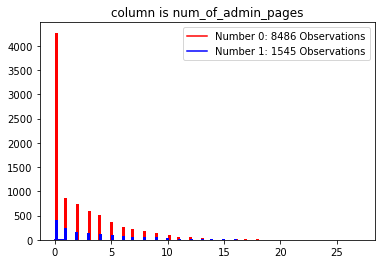

In [3106]:
for_continuous (data, train, "num_of_admin_pages")

####  Exploration on num_of_product_pages

Percentage of Null cells:  517 / 10479  -->  4.93368 %

Percentage of nunique cells:  291 / 10479  -->  2.77698 %

Summary
count    9962.000000
mean       31.618651
std        44.797072
min         0.000000
25%         7.000000
50%        18.000000
75%        38.000000
max       705.000000
Name: num_of_product_pages, dtype: float64

Number of outliers by IQR : 792


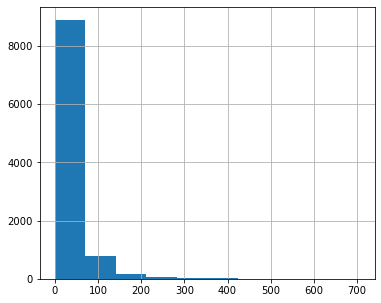

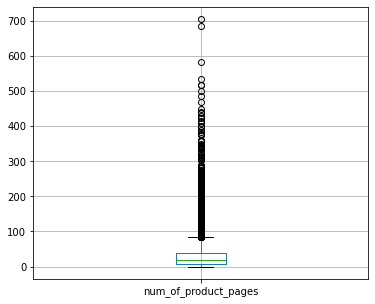

C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

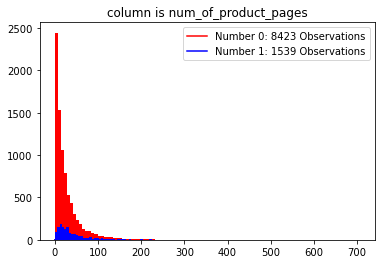

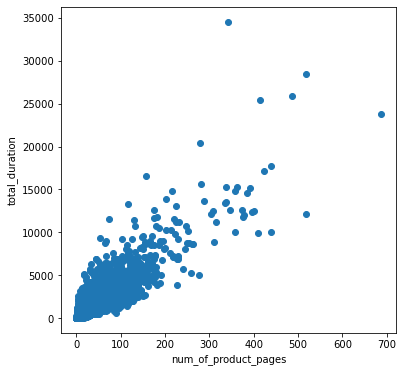

In [3107]:
for_continuous (data, train, "num_of_product_pages")

####  Exploration on ExitRates

Percentage of Null cells:  27 / 10479  -->  0.25766 %

Percentage of nunique cells:  4143 / 10479  -->  39.53622 %

Summary
count    10452.000000
mean         0.043169
std          0.048709
min          0.000000
25%          0.014286
50%          0.025398
75%          0.050000
max          0.200000
Name: ExitRates, dtype: float64

Number of outliers by IQR : 929


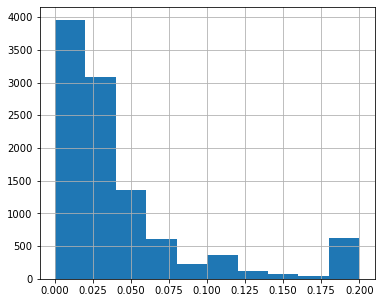

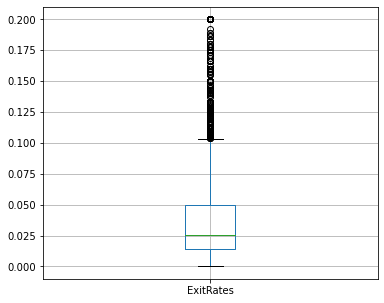

C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

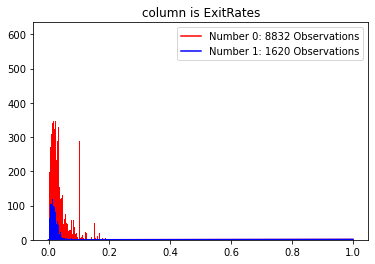

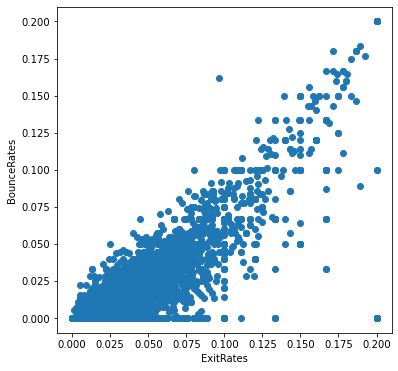

In [3108]:
for_continuous (data, train, "ExitRates")

####  Exploration on num_of_info_pages

Percentage of Null cells:  658 / 10479  -->  6.27923 %

Percentage of nunique cells:  16 / 10479  -->  0.15269 %

Summary
count    9821.000000
mean        0.501884
std         1.258180
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        16.000000
Name: num_of_info_pages, dtype: float64

Number of outliers by IQR : 2098


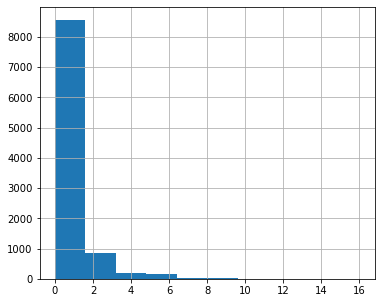

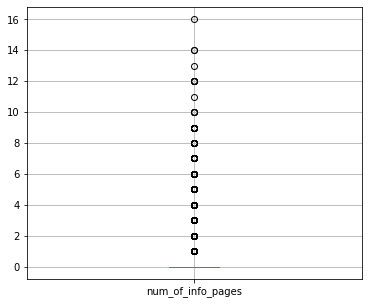

C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

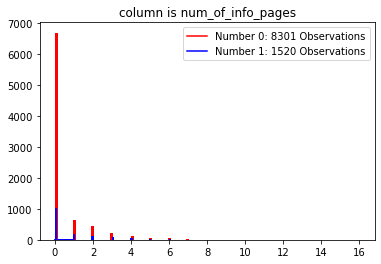

In [3109]:
for_continuous (data, train, "num_of_info_pages")

####  Exploration on D

Percentage of Null cells:  10370 / 10479  -->  98.95982 %

Percentage of nunique cells:  109 / 10479  -->  1.04018 %

Summary
count    109.000000
mean       4.382902
std        2.279466
min       -0.986673
25%        3.282590
50%        4.915126
75%        6.141652
max        8.173454
Name: D, dtype: float64

Number of outliers by IQR : 0


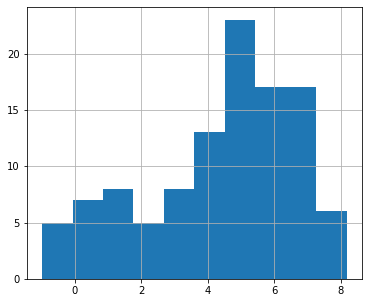

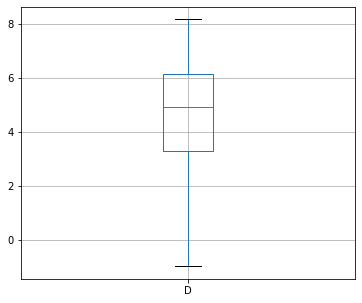

C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

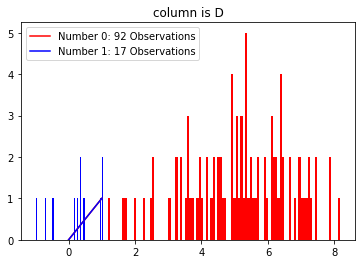

In [3110]:
for_continuous (data, train, "D")

####  Exploration on admin_page_duration

Percentage of Null cells:  667 / 10479  -->  6.36511 %

Percentage of nunique cells:  2799 / 10479  -->  26.71056 %

Summary
count    9812.000000
mean       81.787334
std       180.916462
min         0.000000
25%         0.000000
50%         8.000000
75%        92.600000
max      3398.750000
Name: admin_page_duration, dtype: float64

Number of outliers by IQR : 951


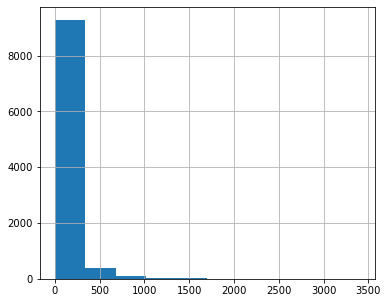

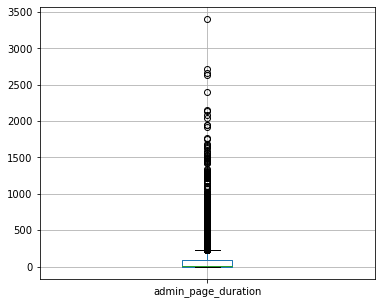

C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

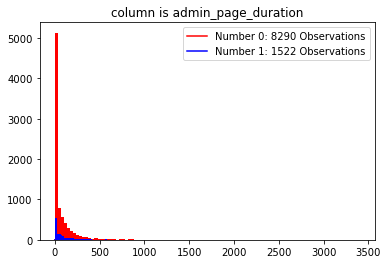

In [3111]:
for_continuous (data, train, "admin_page_duration")

####  Exploration on PageValues

Percentage of Null cells:  14 / 10479  -->  0.1336 %

Percentage of nunique cells:  2282 / 10479  -->  21.77689 %

Summary
count    10465.000000
mean         5.898870
std         18.812536
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

Number of outliers by IQR : 2299


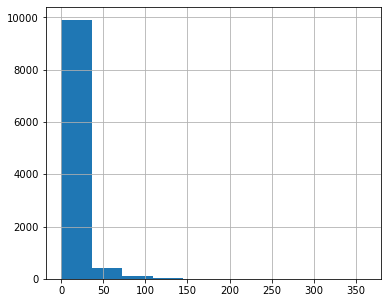

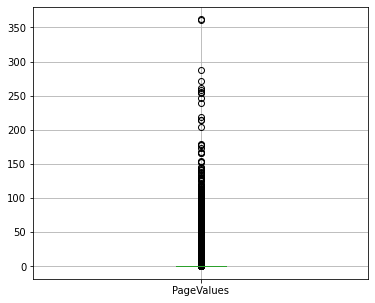

C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\almog\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

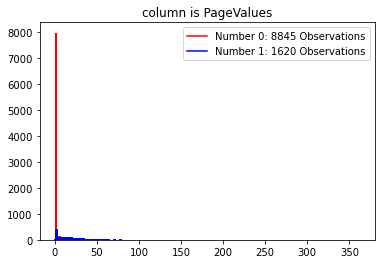

In [3112]:
for_continuous (data, train, "PageValues")

####  Exploration on Month

Percentage of Null cells:  21 / 10479  -->  0.2004 %

Percentage of nunique cells:  10 / 10479  -->  0.09543 %

Number of outliers by IQR : 0

The number of values in each category
Month
Aug      378
Dec     1443
Feb      165
Jul      368
June     234
Mar     1627
May     2869
Nov     2527
Oct      473
Sep      374
dtype: int64


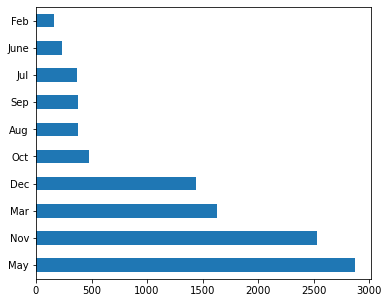

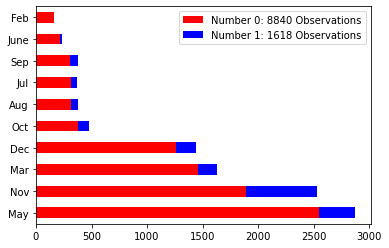

In [3113]:
for_categorical(data, train, "Month")

####  Exploration on device

Percentage of Null cells:  385 / 10479  -->  3.67401 %

Percentage of nunique cells:  8 / 10479  -->  0.07634 %

Number of outliers by IQR : 84

The number of values in each category
device
1.0    2134
2.0    5414
3.0    2063
4.0     399
5.0       6
6.0      16
7.0       5
8.0      57
dtype: int64


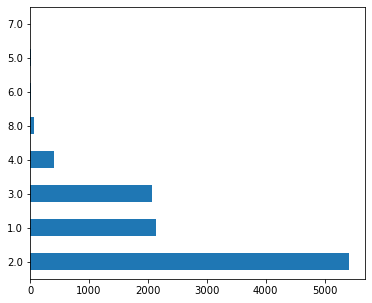

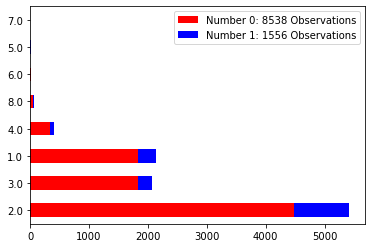

In [3114]:
for_categorical(data, train, "device")

####  Exploration on C

Percentage of Null cells:  18 / 10479  -->  0.17177 %

Percentage of nunique cells:  6 / 10479  -->  0.05726 %

Number of outliers by IQR : 0

The number of values in each category
C
log200     1750
log202     1825
log400     1773
log404     1707
log8080    1730
log_100    1676
dtype: int64


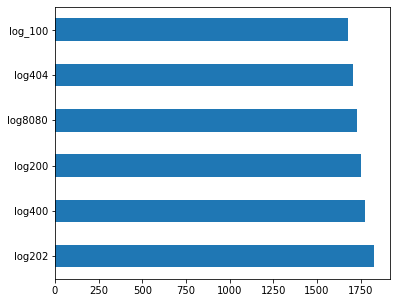

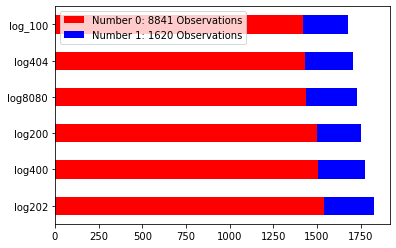

In [3115]:
for_categorical(data, train, "C")

####  Exploration on user_type

Percentage of Null cells:  24 / 10479  -->  0.22903 %

Percentage of nunique cells:  3 / 10479  -->  0.02863 %

Number of outliers by IQR : 0

The number of values in each category
user_type
New_Visitor          1442
Other                  72
Returning_Visitor    8941
dtype: int64


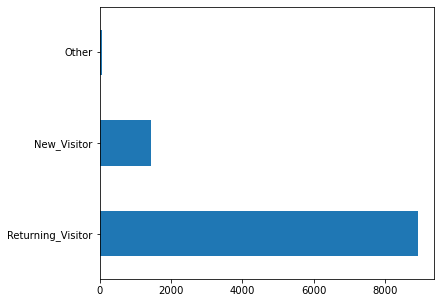

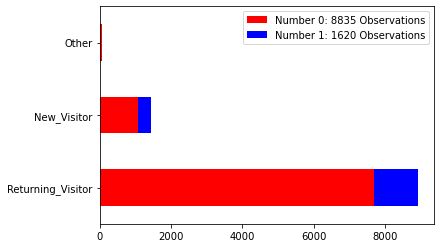

In [3116]:
for_categorical(data, train, "user_type")

####  Exploration on Region

Percentage of Null cells:  18 / 10479  -->  0.17177 %

Percentage of nunique cells:  9 / 10479  -->  0.08589 %

Number of outliers by IQR : 433

The number of values in each category
Region
1.0    4072
2.0     955
3.0    2049
4.0     984
5.0     268
6.0     679
7.0     654
8.0     367
9.0     433
dtype: int64


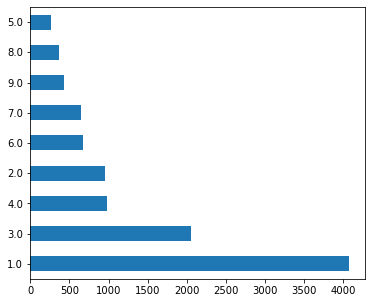

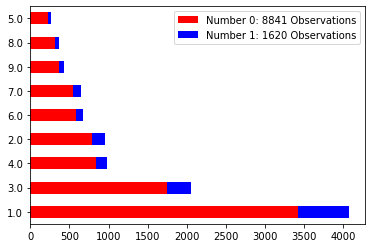

In [3117]:
for_categorical(data, train, "Region")

####  Exploration on A

אפשר לראות שהיא קטגוריאלית, אבל בפועל היא יותר מתאימה להיות רציפה. טווח יחסית גדול של ערכים, וה-C מפריע

Percentage of Null cells:  389 / 10479  -->  3.71219 %

Percentage of nunique cells:  97 / 10479  -->  0.92566 %

Number of outliers by IQR : 0

The number of values in each category
A
c_1     1973
c_10     366
c_11     194
c_12       1
c_13     611
        ... 
c_5      226
c_6      368
c_7       38
c_8      281
c_9       32
Length: 97, dtype: int64


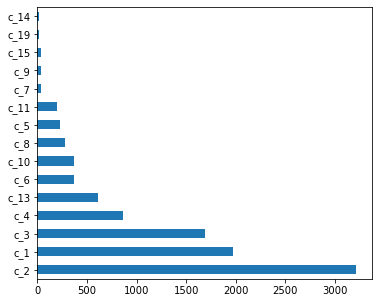

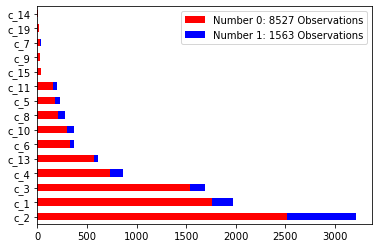

In [3118]:
for_categorical(data, train, "A")

####  Exploration on Weekend

Percentage of Null cells:  23 / 10479  -->  0.21949 %

Percentage of nunique cells:  2 / 10479  -->  0.01909 %

Number of outliers by IQR : 2445

The number of values in each category
Weekend
0.0    8011
1.0    2445
dtype: int64


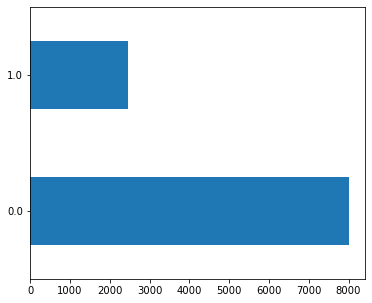

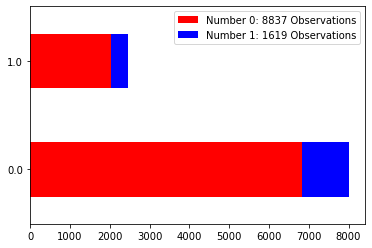

In [3119]:
for_categorical(data, train, "Weekend")

####  Exploration on internet_browser

Percentage of Null cells:  644 / 10479  -->  6.14562 %

Percentage of nunique cells:  125 / 10479  -->  1.19286 %

Number of outliers by IQR : 0

The number of values in each category
internet_browser
browser_10_v10     10
browser_10_v11     11
browser_10_v12     11
browser_10_v13      4
browser_10_v14     10
                 ... 
safari_14         286
safari_14.1       271
safari_15         283
safari_15.2       267
safari_15.4       278
Length: 125, dtype: int64


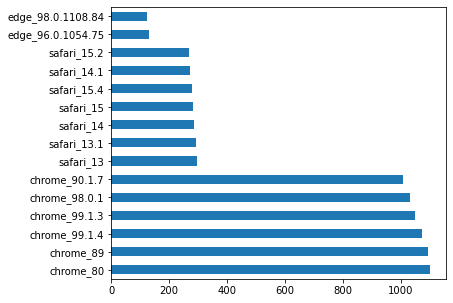

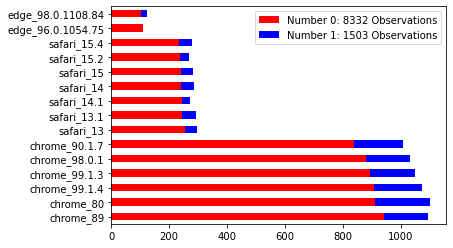

In [3120]:
for_categorical(data, train, "internet_browser")

####  Exploration on purchase - The Answer

<Figure size 432x288 with 0 Axes>

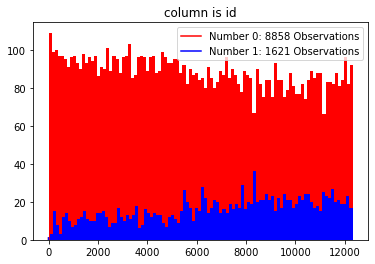

In [3121]:
#for_categorical(a, df, "purchase")
#df['purchase'].value_counts()
continuous_results_by_column (data, "id")

להוסיף
* שורה תחתונה לכל פיצ'ר
* כותרות לגרפים הקיימים
* האם יש אפשרות להציג גרפים אחד ליד השני, ולא אחד מתחת לשני?
* עוד פרטים לתעודת זהות?
* האם זה מגדיל את זמן הריצה?

In [3122]:
#fig=plt.figure()
#a=fig.add_axes((0.05,0.05,0.4,0.4)) # number here are coordinate (left,bottom,width,height)
#b=fig.add_axes((0.05,0.5,0.4,0.4))
#c=fig.add_axes((0.5,0.05,0.4,0.85))

#df1.plot('type_of_plot', ax=a);
#df2.plot('type_of_plot', ax=b);
#df3.plot('type_of_plot', ax=c);

## Part B - Preprocessing

#### Convert to float

In [3123]:
def to_float(text, start=None, end=None):
    try:
        return float(text[start:end])
    except TypeError:
        return text

In [3124]:
train["product_page_duration"] = train["product_page_duration"].apply(to_float, end=-8)
train["info_page_duration"] = train["info_page_duration"].apply(to_float, end=-8)
train["A"] = train["A"].apply(to_float, start=2)

#### Missing Value

In [3125]:
#Deleting Missing Values - drop the entire column
def dropcol (df_in, col):
    df_in = df_in.drop(col,axis=1)
    return df_in

#Deleting Missing Values- dropna
def dropna (df_in):
    df_in.dropna()
    return df_in

#Imputing Missing Values - fillna by mean (numerical)
def fillna_by_mean (df_in, col_name):
    col = df_in[col_name] 
    col_mean = col.mean()
    col.fillna(col_mean, inplace=True)
    return df_in

#Imputing Missing Values - fillna by median (numerical)
def fillna_by_median (df_in, col_name):
    col = df_in[col_name] 
    col_median = col.median()
    col.fillna(col_median, inplace=True)
    return df_in

#Imputing Missing Values - fillna by KNN (numerical)
def fillna_by_KNN (df_in, col_name, num):
    imputer = KNNImputer(n_neighbors=num)
    df_in[col_name] = pd.DataFrame(imputer.fit_transform(df_in[col_name])) 
    return

#Imputing Missing Values - fillna by most frequent (categorical)
def fillna_by_most_frequent (df_in, col_name):
    col = df_in[col_name] 
    col_freq = col.mode()
    col.fillna(col_freq[0], inplace=True) # if we have more then one category? !!! think!
    return

# for each feature, we should decide which method is the best (mean; median; categorical; zero; Constant; KNN - by neighbors?)

In [3126]:
# fill the missing values in "durations" columns and then sum them and fill "total duration" column 
fillna_by_KNN (train, ['product_page_duration','info_page_duration','admin_page_duration'], 10)
sum_duration= train["admin_page_duration"] + train["info_page_duration"] + train["product_page_duration"]
train["total_duration"]=train["total_duration"].fillna(sum_duration)

# fill the rest numeric columns by KNN
fillna_by_KNN (train, ['closeness_to_holiday','num_of_admin_pages','num_of_product_pages', 'num_of_info_pages', 'PageValues' ,'A', 'B', 'ExitRates', 'BounceRates'], 10)

# drop D
train = dropcol (train, "D")

# drop columns with high correlation

# fill the categorical columns by most_frequent
fillna_by_most_frequent(train, "Month")
fillna_by_most_frequent(train, "device")
fillna_by_most_frequent(train, "C")
fillna_by_most_frequent(train, "user_type")
fillna_by_most_frequent(train, "Region")
fillna_by_most_frequent(train, "Weekend")
fillna_by_most_frequent(train, "internet_browser")

#### Split the "internet_browser" column to "browser" and "version"

In [3127]:
#sperate the internet_browser data to browser and version
train['internet_browser']=train['internet_browser'].str.replace('_v','.')
train[['browser','version']]=train['internet_browser'].str.split('_',expand=True)
train["version"]= train["version"].str.slice(0,2)
train= dropcol (train, "internet_browser")

#### maching the types of the data

In [3128]:
train['device']=train['device'].astype('category')
train['Region']=train['Region'].astype('category')
train['Month']=train['Month'].astype('category')
train['C']=train['C'].astype('category')
train['Weekend']=train['Weekend'].astype('category')
train['browser']=train['browser'].astype('category')
train['user_type']=train['user_type'].astype('category')

train['num_of_admin_pages']=train['num_of_admin_pages'].astype('int64')
train['num_of_product_pages']=train['num_of_product_pages'].astype('int64')
train['num_of_info_pages']=train['num_of_info_pages'].astype('int64')
train['num_of_product_pages']=train['num_of_product_pages'].astype('int64')
train['num_of_info_pages']=train['num_of_info_pages'].astype('int64')
train['A']=train['A'].astype('float64')

#### Categorical variables

In [3129]:
def categorical_to_numerical(df_in, col_name):
    frames = [df_in]
    for i in col_name:
        a = pd.get_dummies(df_in[i], prefix = i)
        frames.append(a)
    df_edited = pd.concat(frames, axis = 1)
    df_out = df_edited.drop(columns = col_name)
    return df_out

categorical_to_numerical (train, ["device", "Region","Month", "C", "Weekend", "browser", "user_type"])

,closeness_to_holiday,B,product_page_duration,BounceRates,info_page_duration,total_duration,num_of_admin_pages,num_of_product_pages,ExitRates,num_of_info_pages,...,C_log_100,Weekend_0.0,Weekend_1.0,browser_browser,browser_chrome,browser_edge,browser_safari,user_type_New_Visitor,user_type_Other,user_type_Returning_Visitor
0,0.0,84.958154,0.000000,0.200000,0.0,0.000000,0,1,0.200000,0,...,0,1,0,0,0,0,1,0,0,1
1,0.0,102.100162,64.000000,0.000000,0.0,64.000000,0,2,0.100000,0,...,0,1,0,0,1,0,0,0,0,1
2,0.0,100.991064,0.000000,0.200000,0.0,0.000000,0,1,0.200000,0,...,0,1,0,0,0,0,1,0,0,1
3,0.0,120.605525,2.666667,0.050000,0.0,2.666667,0,2,0.140000,0,...,0,1,0,0,1,0,0,0,0,1
4,0.0,87.423708,627.500000,0.020000,0.0,627.500000,1,10,0.050000,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,0.0,107.692408,1783.791667,0.007143,0.0,1928.791667,3,53,0.029031,0,...,0,0,1,1,0,0,0,0,0,1
10475,0.0,92.484176,465.750000,0.000000,0.0,465.750000,0,5,0.021333,0,...,0,0,1,0,1,0,0,0,0,1
10476,0.0,82.528168,184.250000,0.083333,0.0,184.250000,0,6,0.086667,0,...,0,0,1,0,1,0,0,0,0,1
10477,0.0,118.413826,346.000000,0.000000,0.0,421.000000,4,15,0.021053,0,...,0,1,0,0,1,0,0,0,0,1


#### Outliers - Check for outliers and remove if necessary

##### Scaling and Normalization

In [3130]:
#train = pd.DataFrame(StandardScaler().fit_transform(train))

#אולי צריך min max?

#### Dimensionality Reduction

#### PCA or Feature Selection


#### on TEST SET

#### Something spicy???